# Preprocesamiento

En esta cuarta etapa se van a tomar decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')



In [2]:
#dataset de referencia 
deps = DataSet('dsual.h5')

elec=deps.buildings[1].elec # Todos los medidores

labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['Main', 'Fan', 'Freezer', 'Television','Vacuum Cleaner', 'Boiler']})
Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

## Cambio en el muestreo de datos e interpolación

Veamos si hay  seccion faltante

In [3]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

 Muestreo cada 10 segundos, promediando datos (mean)  y usando metodo relleno=ffill

In [4]:
ta = '2022-02-02 10:16:00+01:00'
tb = '2022-02-02 12:58:00+01:00'
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'mean'}))[ta:tb]

physical_quantity             voltage       power                     pf  \
type                                     apparent       active             
2022-02-02 10:16:10+01:00  243.948563  191.709427    15.145640  0.644985   
2022-02-02 10:16:20+01:00  243.924240  171.220123    14.803304  0.647549   
2022-02-02 10:16:30+01:00  243.870300  159.038940    14.591208  0.655690   
2022-02-02 10:16:40+01:00  242.845306         inf   589.711853  0.715962   
2022-02-02 10:16:50+01:00  240.016556         inf  2526.152100  0.987122   
...                               ...         ...          ...       ...   
2022-02-02 12:57:20+01:00  242.294617   80.440697    12.617174  0.630069   
2022-02-02 12:57:30+01:00  242.379272   80.267578    12.614280  0.637428   
2022-02-02 12:57:40+01:00  242.135498   75.361038    12.451256  0.644254   
2022-02-02 12:57:50+01:00  242.268982   77.140190    12.519396  0.640568   
2022-02-02 12:58:00+01:00  242.360001   72.016953    12.339650  0.637537   

physical_quantity            current  frequency      power  
type                                              reactive  
2022-02-02 10:16:10+01:00   0.096260  50.009941  -5.976255  
2022-02-02 10:16:20+01:00   0.093746  50.003109  -6.076593  
2022-02-02 10:16:30+01:00   0.091261  49.995876  -6.076886  
2022-02-02 10:16:40+01:00   2.688525  49.988461  27.890411  
2022-02-02 10:16:50+01:00  10.662050  49.979092  62.584034  
...                              ...        ...        ...  
2022-02-02 12:57:20+01:00   0.082666  50.023113  -5.992646  
2022-02-02 12:57:30+01:00   0.081674  50.022034  -6.142257  
2022-02-02 12:57:40+01:00   0.079819  50.007778  -5.988403  
2022-02-02 12:57:50+01:00   0.080678  50.015041  -6.070859  
2022-02-02 12:58:00+01:00   0.079864  50.022499  -5.956950  

[972 rows x 7 columns]

Muestreo cada 10 segundos, promediando datos (mean) como metodo de relleno y usando el primer dato

In [5]:
ta = '2022-02-02 10:16:00+01:00'
tb = '2022-02-02 12:58:00+01:00'
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity             voltage       power                     pf  \
type                                     apparent       active             
2022-02-02 10:16:10+01:00  243.951508  197.418655    15.246300  0.647985   
2022-02-02 10:16:20+01:00  243.947998  178.151337    14.948080  0.645128   
2022-02-02 10:16:30+01:00  243.916595  176.598251    14.898340  0.656962   
2022-02-02 10:16:40+01:00  243.891998  155.541763    14.545600  0.656028   
2022-02-02 10:16:50+01:00  239.979401         inf  2563.216064  0.998165   
...                               ...         ...          ...       ...   
2022-02-02 12:57:20+01:00  242.236206   70.458130    12.263480  0.621199   
2022-02-02 12:57:30+01:00  242.464600   77.369026    12.524580  0.623726   
2022-02-02 12:57:40+01:00  242.054001   80.512634    12.654700  0.654005   
2022-02-02 12:57:50+01:00  242.027405   79.503090    12.607480  0.642676   
2022-02-02 12:58:00+01:00  242.360001   72.016953    12.339650  0.637537   

physical_quantity            current  frequency      power  
type                                              reactive  
2022-02-02 10:16:10+01:00   0.096481  50.010803  -6.157390  
2022-02-02 10:16:20+01:00   0.095011  50.007900  -6.066718  
2022-02-02 10:16:30+01:00   0.092960  49.998501  -6.137362  
2022-02-02 10:16:40+01:00   0.090913  49.992020  -6.200194  
2022-02-02 10:16:50+01:00  10.700621  49.982620  63.509418  
...                              ...        ...        ...  
2022-02-02 12:57:20+01:00   0.081504  50.021301  -5.704082  
2022-02-02 12:57:30+01:00   0.082857  50.024361  -6.230612  
2022-02-02 12:57:40+01:00   0.079952  50.014759  -5.972212  
2022-02-02 12:57:50+01:00   0.081043  50.006641  -6.086078  
2022-02-02 12:58:00+01:00   0.079864  50.022499  -5.956950  

[972 rows x 7 columns]

# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

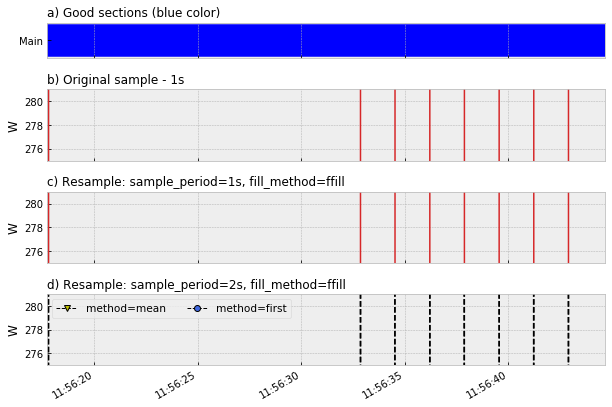

In [6]:
rcParams['figure.figsize'] = (10, 7)

#definición de fechas
ta = '2022-02-02 10:16:00+01:00'
tb = '2022-02-02 12:58:00+01:00'

#contador principal
Main=elec.select(instance=[1])

#definición de  gráficas
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})


#sample a segundo
elec[1].power_series_all_data()[ta:tb].plot(ax=ax1, color='tab:red', marker="o", lw=1.5)
ax1.minorticks_off()
ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')
ax1.annotate("|10:16:00 = 277 W", xy=('2022-02-02 10:16:00+01:00', 277.6),rotation=7)
ax1.set_ylim(275,281)


#sample a 1 segundo metodo fill
elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'})[ta:tb].plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')
ax2.annotate("|10:16:00 = 277 W", xy=('2022-02-02 10:16:00+01:00', 277.6))
ax2.set_ylim(275,281)



#sample a 2 segundos metodo fill
elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)


#good sections
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')
l=['11:56:20','11:56:25','11:56:30','11:56:35','11:56:40','11:56:45','11:56:50']
ax4.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass

## Filtros de dispositivos eléctricos

Vamos a filtrar por aquellos dispositivos cuya potencia activa sea superior a 5,85kwh

In [7]:
Devices=elec.select(instance=[2,3,4,5,6]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

Series([], Name: active, dtype: float64)

Vemos  el top-k entre los dispositivos electricos conectados

In [8]:
Devices = elec.select(instance=[2,3,4,5,6])
Devices.select_top_k(k=5)

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

MeterGroup(meters=
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

## División del dataset

- train: conjunto de datos de entrenamiento de modelos de desagregación
- test: conjunto de datos de validación y pruebas de modelos de desagregación

Entrenamiento:

In [16]:
train = DataSet('dsual.h5')

#train.set_window(start="2021-11-11 17:39:00", end="2021-11-11 17:40:00")
train.set_window(start="2022-02-02 10:16:00", end="2022-02-02 10:58:00")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 10:58:00+01:00', empty=False)

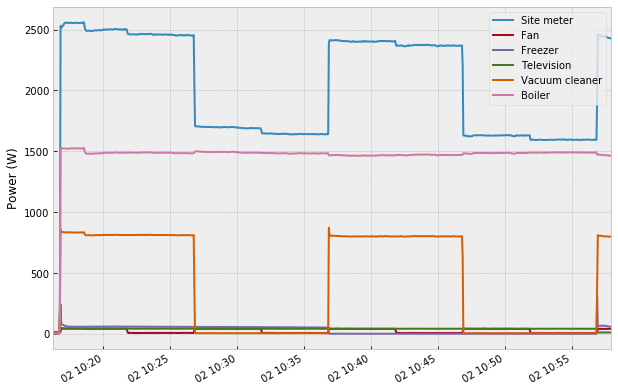

In [17]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



Validación:

In [18]:
 #Validación 

valid = DataSet('dsual.h5')

valid.set_window(start="2022-02-02 10:58:00", end="2022-02-02 12:00:00")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2022-02-02 10:58:00+01:00', end='2022-02-02 12:00:00+01:00', empty=False)

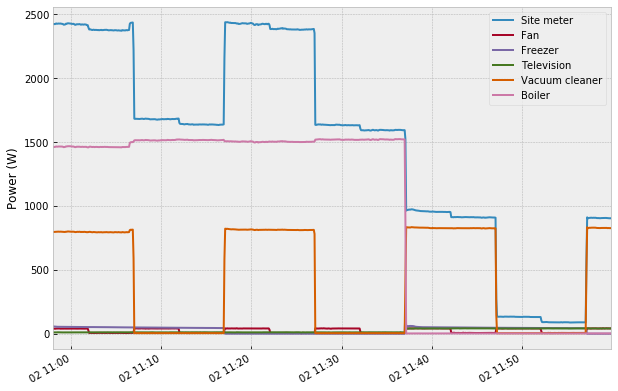

In [19]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

Pruebas

In [30]:
test = DataSet('dsual.h5') #Pruebas

test.set_window(start="2022-02-02 12:01:00", end="2022-02-02 12:58:00")
test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2022-02-02 12:01:00+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

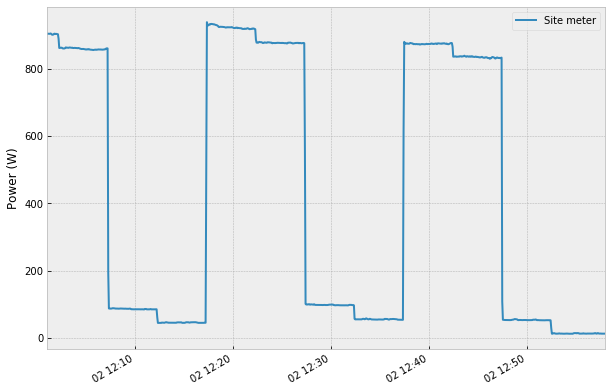

In [31]:
test_elec.mains().plot()